<html>
    <center>
        <h1><u>GRIP - The Sparks Foundation</u></h1><br>
    </center>
    <h3>Data Science & Business Analytics Internship</h3>
    <h3>Prediction using Unsupervised ML</h3>
    <h3>Author: Devansh Gupta</h3>
    <h4>Task 2 - From the given ‘iris’ dataset, predict the optimum number of clusters and represent it visually.</h4>
</html>

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Reading the csv file and checking its head

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Gaining insights from the data

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Preparing the data

In [6]:
x = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


## Finding the optimum number of clusters for k-nn classification

In [9]:
k_range = list(range(1, 13))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

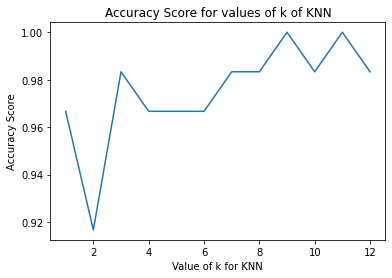

In [10]:
#Plotting the accuracy score for k values of knn
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for values of k of KNN')
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x, y)

knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

## Finding the optimum number of clusters for k-means classification

In [12]:
x = iris.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

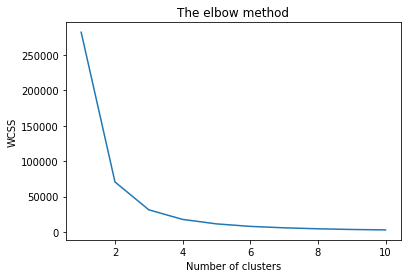

In [13]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [14]:
# Applying kmeans to the iris dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters - On the first two columns

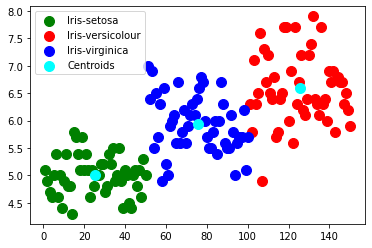

In [15]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
xc = kmeans.cluster_centers_[:, 0]
yc = kmeans.cluster_centers_[:,1]
plt.scatter(xc, yc, s = 100, c = 'cyan', label = 'Centroids')
plt.legend()
plt.show()